CORONA DATASET ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\covid_dataset.csv")

In [4]:
df

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1/22/2020,Anhui,Mainland China,1,0,0
1,1/22/2020,Beijing,Mainland China,14,0,0
2,1/22/2020,Chongqing,Mainland China,6,0,0
3,1/22/2020,Fujian,Mainland China,1,0,0
4,1/22/2020,Gansu,Mainland China,0,0,0
...,...,...,...,...,...,...
45174,6/18/2020,Zacatecas,Mexico,612,69,366
45175,6/18/2020,Zakarpattia Oblast,Ukraine,1882,51,772
45176,6/18/2020,Zaporizhia Oblast,Ukraine,541,16,375
45177,6/18/2020,Zhejiang,Mainland China,1269,1,1267


In [5]:
top_10_deaths = df.groupby('Country/Region')['Deaths'].sum().nlargest(10)

In [6]:
df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)

Country/Region
US                5694069
Italy             2346994
UK                2195732
Spain             1926019
France            1880133
Brazil            1279170
Belgium            582729
Iran               544450
Germany            519194
Mainland China     490864
Name: Deaths, dtype: int64

In [7]:
top_10_deaths

Country/Region
US                5694069
Italy             2346994
UK                2195732
Spain             1926019
France            1880133
Brazil            1279170
Belgium            582729
Iran               544450
Germany            519194
Mainland China     490864
Name: Deaths, dtype: int64

In [8]:
country_grouped = df.groupby('Country/Region')[['Confirmed', 'Deaths']].sum()
country_grouped['Confirmed/Deaths Ratio'] = country_grouped['Confirmed'] / country_grouped['Deaths']
country_grouped

,Confirmed,Deaths,Confirmed/Deaths Ratio
Country/Region,,,
Azerbaijan,1,0,inf
"('St. Martin',)",2,0,inf
Afghanistan,646624,12976,49.832306
Albania,71576,2422,29.552436
Algeria,473539,39564,11.968936
...,...,...,...
Western Sahara,514,24,21.416667
Yemen,14982,3376,4.437796
Zambia,42644,414,103.004831


In [9]:
n = input("N top happiest countries: ")
happiest_countries = df.groupby('Country/Region')['Confirmed'].sum().nsmallest(int(n))
print("Top", n, "happiest countries with lesser number of corona cases:")
print(happiest_countries)

Top 10 happiest countries with lesser number of corona cases:
Country/Region
 Azerbaijan              1
Cape Verde               1
Channel Islands          1
East Timor               1
North Ireland            1
Republic of the Congo    1
The Gambia               1
('St. Martin',)          2
Curacao                  2
St. Martin               2
Name: Confirmed, dtype: int64


In [10]:
df.groupby('Country/Region')['Confirmed'].sum().idxmax()

'US'

In [11]:
grouped = df.groupby('Country/Region')['Confirmed'].sum()
country_with_highest_cases = grouped.idxmax()
filtered_df = df[df['Country/Region'] == country_with_highest_cases]
state_with_highest_confirmed_cases = filtered_df.loc[filtered_df['Confirmed'].idxmax()]
result_df = pd.DataFrame({
    'Country/Region': [country_with_highest_cases],
    'Province/State': [state_with_highest_confirmed_cases['Province/State']],
    'Confirmed': [state_with_highest_confirmed_cases['Confirmed']]
})
print(result_df)


  Country/Region Province/State  Confirmed
0             US       New York     385760


In [12]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [13]:
max_cases_per_country = df.groupby(['Country/Region', 'Province/State'])['Confirmed'].max()
max_cases_per_country = max_cases_per_country.reset_index()
# Group the DataFrame by 'Country/Region' to find the row with the maximum confirmed cases in each country
max_cases_per_country = max_cases_per_country.loc[max_cases_per_country.groupby('Country/Region')['Confirmed'].idxmax()]
print(max_cases_per_country[['Country/Region', 'Province/State', 'Confirmed']])

     Country/Region                Province/State  Confirmed
5         Australia               New South Wales       3143
36           Brazil                     Sao Paulo     192628
55           Canada                        Quebec      54383
71            Chile                 Metropolitana     183553
84         Colombia              Capital District      17392
111         Denmark                       Denmark       1326
117          France              French Polynesia      19874
128         Germany                        Bayern      47747
144       Hong Kong                     Hong Kong       1124
165           India                   Maharashtra     120504
182          Israel         From Diamond Princess          1
191           Italy                     Lombardia      92518
244           Japan                         Tokyo       5680
252           Macau                         Macau         45
265  Mainland China                         Hubei      68135
290          Mexico     

In [14]:
max_cases_per_country

,Country/Region,Province/State,Confirmed
5,Australia,New South Wales,3143
36,Brazil,Sao Paulo,192628
55,Canada,Quebec,54383
71,Chile,Metropolitana,183553
84,Colombia,Capital District,17392
111,Denmark,Denmark,1326
117,France,French Polynesia,19874
128,Germany,Bayern,47747
144,Hong Kong,Hong Kong,1124
165,India,Maharashtra,120504


In [ ]:
def plot_province_data(country):
    country_data = df[df['Country/Region'] == country]
    country_data[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].plot(x='Province/State', kind='bar', stacked=True)
    plt.title(f"Province-wise Data for {country}")
    plt.xlabel("Province/State")
    plt.ylabel("Number of Cases")
    plt.show()


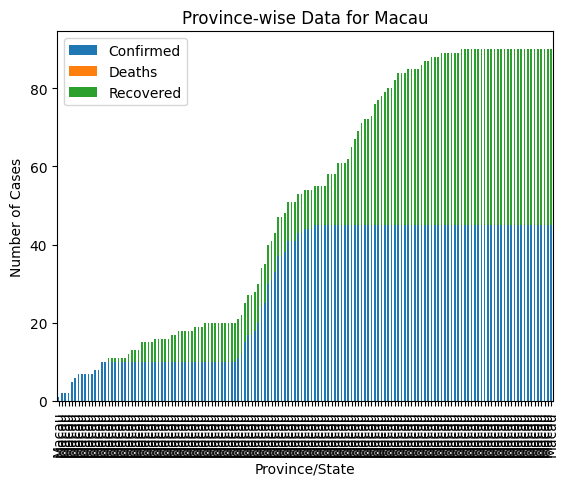

In [23]:
country_input = input("Enter Country to plot State-wise data: ")
plot_province_data(country_input)